In [10]:
##Estimación de indicadores de población ocupada en cultura
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Using GitHub PAT from the git credential store.




rlang    (1.1.4 -> 1.1.6) [CRAN]
glue     (1.7.0 -> 1.8.0) [CRAN]
cli      (3.6.3 -> 3.6.5) [CRAN]
magrittr (2.0.3 -> 2.0.4) [CRAN]
tibble   (3.2.1 -> 3.3.0) [CRAN]
ggplot2  (3.5.2 -> 4.0.0) [CRAN]


Installing 6 packages: rlang, glue, cli, magrittr, tibble, ggplot2

Warning message:
"packages 'tibble', 'ggplot2' are in use and will not be installed"
Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"


package 'magrittr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'magrittr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\magrittr\libs\x64\magrittr.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\magrittr\libs\x64\magrittr.dll: Permission denied"
Warning message:
"restored 'magrittr'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\RtmpWoDic7\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\RtmpWoDic7\remotes79886d001e92\cpyp-ipdp-funcionespgd-6fd64b9/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Warning message:
"package 'funcionespgd' is in use and will not be installed"


In [11]:
pib<- read_csv("pibpc_cdmx.csv")%>%
janitor::clean_names()%>%
rename(year=ano)%>%
mutate(year=as.numeric(year),
pibpc=pibpc/1000)%>%
select(year,pibpc)%>%
intervals("pibpc", margen = 0.004, año_base = 2024)

pib

Rows: 43 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): año, pib, tasa_crecimiento, poblacion, pibpc

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2003,320.1941,320.1941,320.1941
2004,331.6686,331.6686,331.6686
2005,333.1861,333.1861,333.1861
2006,348.1799,348.1799,348.1799
2007,348.7013,348.7013,348.7013
2008,352.8247,352.8247,352.8247
2009,333.2302,333.2302,333.2302
2010,345.6064,345.6064,345.6064
2011,356.1096,356.1096,356.1096


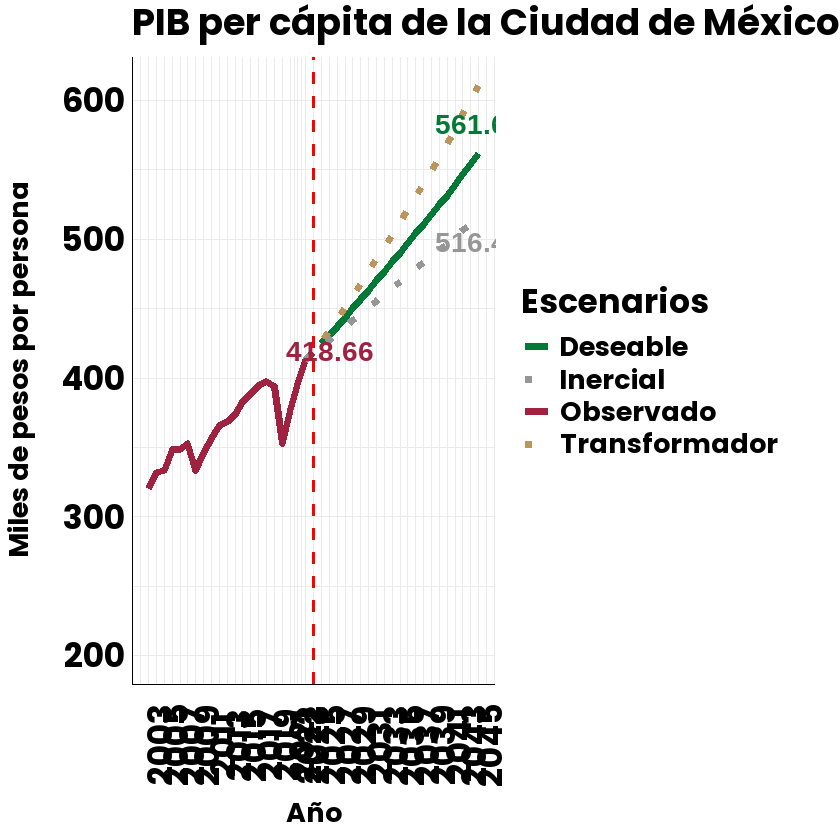

In [12]:
grafica_bonita(
  data = pib,
  x = "year",
  y = "estimado",
  titulo = "PIB per cápita de la Ciudad de México",
    ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
  desplazamiento_ano_base=c(2,1),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Miles de pesos por persona",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 200
)

ggsave("H:/Mi unidad/pgd/graficas/Línea 18. De Economía Dinámica, Innovadora y de Prosperidad Compartida/pib_percapita_estimada.png", 
width = 10, height = 7, dpi = 200, bg = "white")

In [13]:
ied<- read_csv("ied_cdmx.csv")%>%
janitor::clean_names()%>%
rename(year=ano)%>%
mutate(year=as.numeric(year))%>%
select(year,porcentaje)%>%
intervals("porcentaje", margen = 0.004, año_base = 2024)
ied

Rows: 41 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): año, porcentaje

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2006,26.704807,26.704807,26.704807
2007,21.397919,21.397919,21.397919
2008,26.179828,26.179828,26.179828
2009,29.436927,29.436927,29.436927
2010,14.948750,14.948750,14.948750
2011,29.289335,29.289335,29.289335
2012,6.143795,6.143795,6.143795
2013,12.067843,12.067843,12.067843
2014,20.186236,20.186236,20.186236


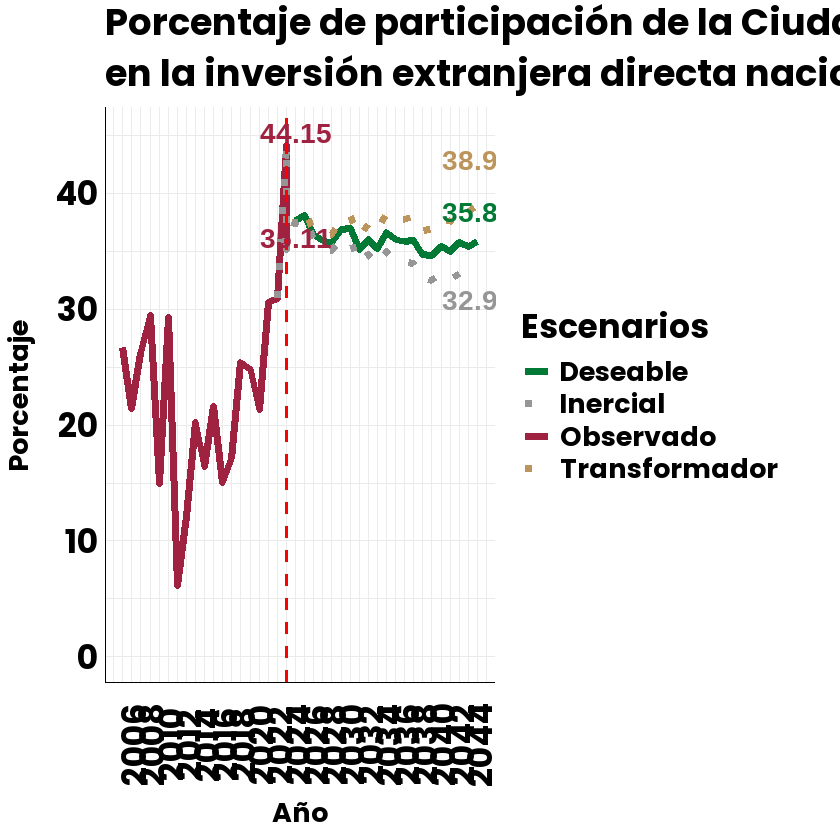

In [14]:
grafica_bonita(
  data = ied,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de participación de la Ciudad de México 
en la inversión extranjera directa nacional",
  ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  desplazamiento_ano_base=c(1,1),
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/Línea 18. De Economía Dinámica, Innovadora y de Prosperidad Compartida/ied_estimada.png", 
width = 10, height = 6, dpi = 185, bg = "white")